# $k$-means

## Mastère ESD - Introduction au Machine Learning

## Librairies utilisées

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

## Données utilisées

In [2]:
iris = pandas.read_table("https://fxjollois.github.io/donnees/Iris.txt", sep = "\t")
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris2 = iris.drop("Species", axis = 1)
iris2.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Réalisation de la CAH

In [4]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scale(iris2))

KMeans(n_clusters=3)

## Informations sur la partition

In [5]:
pandas.Series(kmeans.labels_).value_counts()

0    53
2    50
1    47
dtype: int64

## Centre des classes

In [6]:
kmeans.cluster_centers_

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349]])

In [7]:
iris2.assign(classe = kmeans.labels_).groupby("classe").mean()

,Sepal Length,Sepal Width,Petal Length,Petal Width
classe,,,,
0,5.801887,2.673585,4.369811,1.413208
1,6.780851,3.095745,5.510638,1.972340
2,5.006000,3.428000,1.462000,0.246000


## Choix du nombre de classes

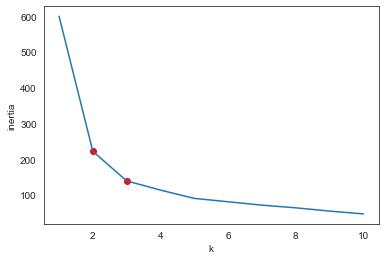

In [8]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(scale(iris2))
    inertia = inertia + [kmeans.inertia_]
inertia = pandas.DataFrame({"k": range(1, 11), "inertia": inertia})
seaborn.lineplot(data = inertia, x = "k", y = "inertia")
plt.scatter(2, inertia.query('k == 2')["inertia"], c = "red")
plt.scatter(3, inertia.query('k == 3')["inertia"], c = "red")
plt.show()